# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
!pip install citipy

     |████████████████████████████████| 563kB 3.5MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559703 sha256=cbeaef9318f98a475be2ca01ddba1b2d6cfdd988e99aaa0c5bf25cd2cb8f122c
  Stored in directory: /Users/baeelson/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [116]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"In total we selected {len(cities)} cities.")

In total we selected 626 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'
url_units = url + "?appid=" + weather_api_key + "&units=" + units

def cityQuery(city):
    return f"{url_units}&q={city}"

In [ ]:
# set up lists to hold reponse info
temps = []
count = 0
set_count = 1
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print('-'*50)
for city in cities:
    count += 1
    if count%51 == 0:
        time.sleep(3)
        set_count += 1
        count = 1
    response = requests.get(cityQuery(city)).json()
    try:
        print(f"Processing Record {count} of Set {set_count} | {city}")
        temps.append({'City':response['name'],
                      'Cloudiness':response['clouds']['all'],
                      'Country':response['sys']['country'],
                      'Date':response['dt'],
                      'Humidity':response['main']['humidity'],
                      'Lat':response['coord']['lat'],
                      'Lng':response['coord']['lon'],
                      'Max Temp':response['main']['temp_max'],
                      'Wind Speed':response['wind']['speed']})
    except Exception as e:
        if e.args[0] == 'name':
            print('City not found. Skipping...')
        else:
            print(f"Didn't have any {e} listed.")
            
print('-'*50)
print('Data Retrieval Complete')
print('-'*50)

In [73]:
print(f"There were {len(cities)-len(temps)} cities that the API couldn't find.")
print(f"So now we are left with data from {len(temps)} cities.")

There were 48 cities that the API couldn't find.
So now we are left with data from 578 cities.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
weather_df = pd.DataFrame(temps)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lamar,90,US,1584760492,81,33.67,-95.58,45.00,12.75
1,Codrington,100,AU,1584760492,71,-38.27,141.97,57.65,8.95
2,Lerwick,0,GB,1584760492,55,60.15,-1.15,39.20,6.93
3,Hilo,90,US,1584760460,78,19.73,-155.09,73.99,6.80
4,Mehamn,99,NO,1584760238,83,71.04,27.85,22.37,19.62


In [71]:
weather_df.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

In [117]:
# and output the data as a csv to our previously saved location
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [97]:
def Lat_vs_plot(y_values, units):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(weather_df["Lat"], weather_df[y_values],
                edgecolors="black", alpha=0.7, c=weather_df['Lng'])
    plt.title(f"City Latitude vs. {y_values} ({time.strftime('%m/%d/%y')})")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_values} ({units})")
    plt.colorbar(label= 'Longitude')
    plt.xlim(-60,80)
    plt.grid (b=True, which="major", axis="both", color="lightgrey")
    plt.savefig(f"output_data/Lat_vs_{y_values}.png")
    plt.show()

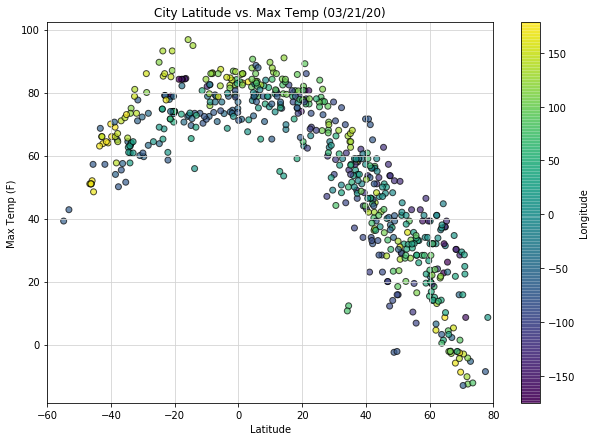

In [98]:
Lat_vs_plot('Max Temp', 'F')

#### Latitude vs. Humidity Plot

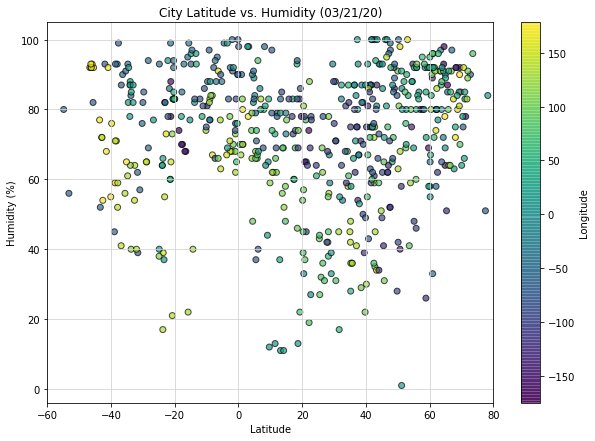

In [99]:
Lat_vs_plot('Humidity', '%')

#### Latitude vs. Cloudiness Plot

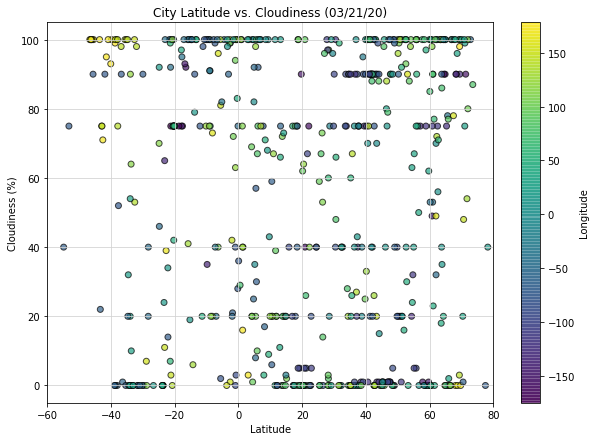

In [100]:
Lat_vs_plot('Cloudiness', '%')

#### Latitude vs. Wind Speed Plot

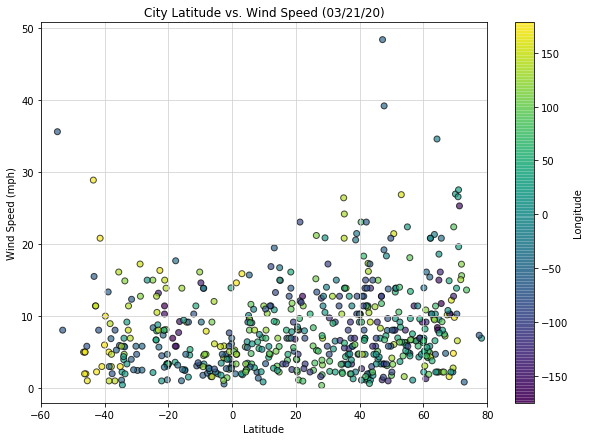

In [101]:
Lat_vs_plot('Wind Speed', 'mph')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8951199721118602


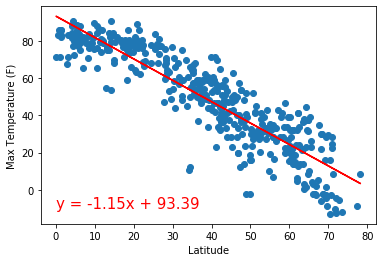

In [114]:
#### comment all this
x_values = weather_df.loc[weather_df['Lat']>0]['Lat'].astype(float)
y_values = weather_df.loc[weather_df['Lat']>0]['Max Temp'].astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig(f"output_data/North_Hem_Regression.png")

print(f"R squard: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.6816691541672926


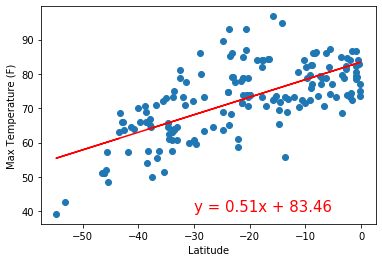

In [115]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = weather_df.loc[weather_df['Lat']<0]['Lat'].astype(float)
y_values = weather_df.loc[weather_df['Lat']<0]['Max Temp'].astype(float)

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save an image
plt.savefig(f"output_data/South_Hem_Regression.png")

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

## Analysis
* Temperature increases as we approach the equator as expected. The Southern hemisphere was a bit more disperse than the Northern, this could be due to the time of year. Would be interesting to run this once a quarter. 
* Not much came from breaking out the Longitude in the colored z-axis except in one region. If you notice between 40 to 65 Lat on the Max Temp plot, -100 to -150 Lng (United States and Canada) seems to have more diversity in temperature compared to 25 to 75 Lng (the Middle East and Western Russia). This could be due to my samples, but it showed up all three times I reran the random generator cell. Can't prove anything unless I run it different time a year though...
* No need to run the bonus regressions on humidity, cloudiness, or windspeed as clearly geographic location don't seem to have an effect. I assume topography and proximity to large bodies of water affect those much more. 